In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
plt.style.use('seaborn')

In [2]:
os.getcwd()

'C:\\Users\\HOME\\Desktop\\머신러닝'

In [3]:
# Reading the Train and Test files
train_df = pd.read_csv("C:/Users/HOME/Desktop/머신러닝/train.csv")
test_df = pd.read_csv("C:/Users/HOME/Desktop/머신러닝/test.csv")
submission = pd.read_csv("C:/Users/HOME/Desktop/머신러닝/sample_submission.csv")
submission["type"] = "Unknown"

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [6]:
print("Train Data Null Values Count \n",train_df.isna().sum())
print("Test Data Null Values Count \n",test_df.isna().sum())

Train Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64
Test Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64


In [7]:
train_data = train_df.drop(columns=['id'],axis=1)

In [8]:
test_data = test_df.drop(columns=['id'])

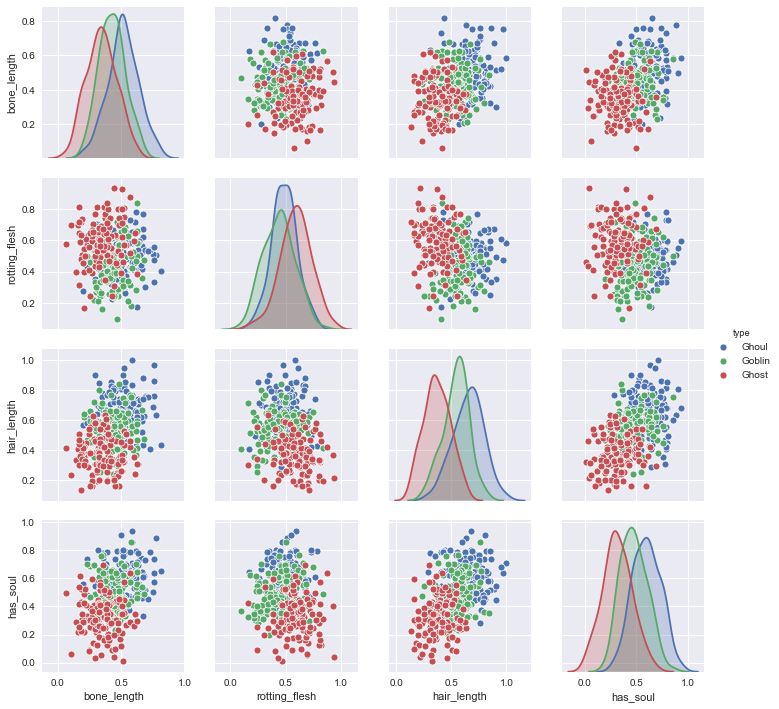

In [9]:
sns.pairplot(train_data,hue="type")

C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


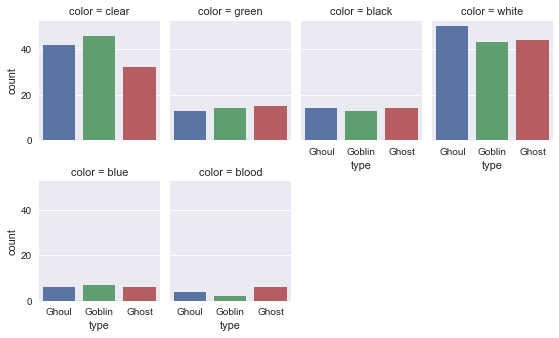

In [10]:
sns.factorplot("type", col="color", col_wrap=4, data=train_data, kind="count", size=2.4, aspect=.8)

In [11]:
train_data.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [12]:
train_data['hair_soul'] = train_data['hair_length'] * train_data['has_soul']
train_data['hair_bone'] = train_data['hair_length'] * train_data['bone_length']
test_data['hair_soul'] = test_data['hair_length'] * test_data['has_soul']
test_data['hair_bone'] = test_data['hair_length'] * test_data['bone_length']
train_data['hair_soul_bone'] = train_data['hair_length'] * train_data['has_soul'] * train_data['bone_length']
test_data['hair_soul_bone'] = test_data['hair_length'] * test_data['has_soul'] * test_data['bone_length']

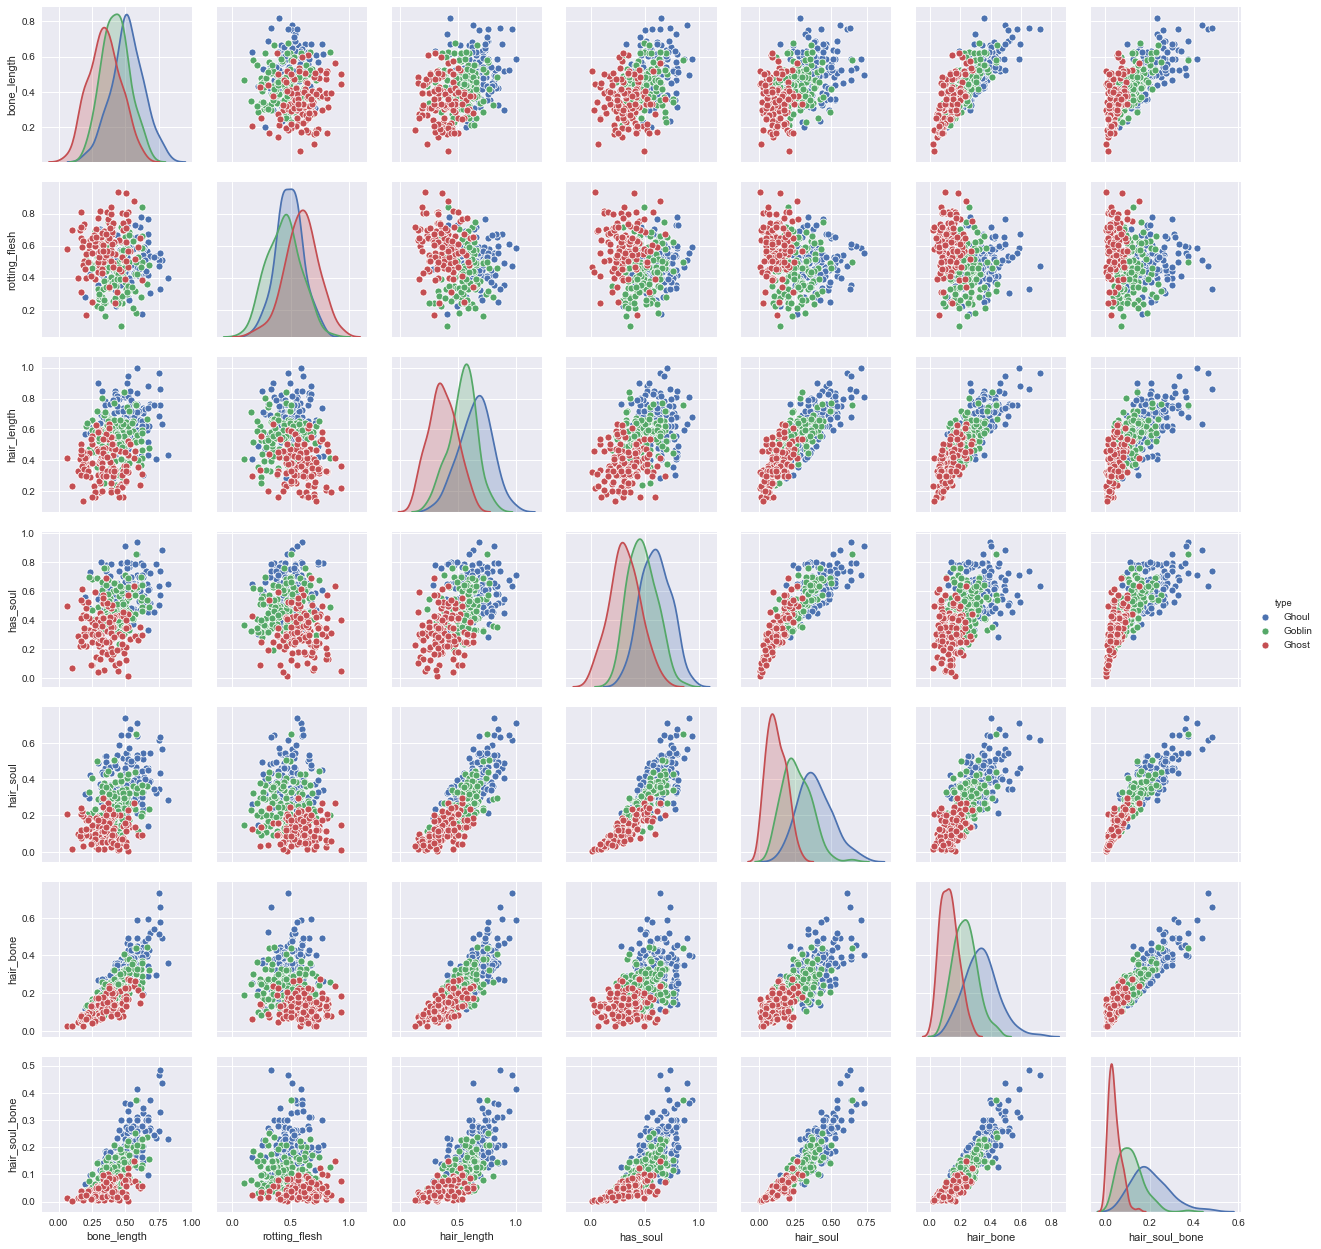

In [13]:
sns.pairplot(train_data,hue='type')

In [14]:
le = LabelEncoder()
train_data['type'] = le.fit_transform(train_data['type'])
print(train_data.type.value_counts())

1    129
2    125
0    117
Name: type, dtype: int64


In [46]:
print(train_data)

     bone_length  rotting_flesh  hair_length  has_soul  color  type  \
0       0.354512       0.350839     0.465761  0.781142  clear     1   
1       0.575560       0.425868     0.531401  0.439899  green     2   
2       0.467875       0.354330     0.811616  0.791225  black     1   
3       0.776652       0.508723     0.636766  0.884464  black     1   
4       0.566117       0.875862     0.418594  0.636438  green     0   
..           ...            ...          ...       ...    ...   ...   
366     0.458132       0.391760     0.660590  0.635689   blue     2   
367     0.331936       0.564836     0.539216  0.551471  green     0   
368     0.481640       0.501147     0.496446  0.544003  clear     1   
369     0.294943       0.771286     0.583503  0.300618  clear     0   
370     0.670200       0.768469     0.737274  0.608384  white     1   

     hair_soul  hair_bone  hair_soul_bone  
0     0.363825   0.165118        0.128980  
1     0.233763   0.305853        0.134545  
2     0.642171 

In [49]:
train_data_x = train_data.drop(columns=['type'],axis=1)
train_data_y = train_data['type'].values

In [50]:
print(train_data_x)

     bone_length  rotting_flesh  hair_length  has_soul  color  hair_soul  \
0       0.354512       0.350839     0.465761  0.781142  clear   0.363825   
1       0.575560       0.425868     0.531401  0.439899  green   0.233763   
2       0.467875       0.354330     0.811616  0.791225  black   0.642171   
3       0.776652       0.508723     0.636766  0.884464  black   0.563196   
4       0.566117       0.875862     0.418594  0.636438  green   0.266409   
..           ...            ...          ...       ...    ...        ...   
366     0.458132       0.391760     0.660590  0.635689   blue   0.419930   
367     0.331936       0.564836     0.539216  0.551471  green   0.297361   
368     0.481640       0.501147     0.496446  0.544003  clear   0.270068   
369     0.294943       0.771286     0.583503  0.300618  clear   0.175411   
370     0.670200       0.768469     0.737274  0.608384  white   0.448546   

     hair_bone  hair_soul_bone  
0     0.165118        0.128980  
1     0.305853       

In [20]:
train_data_x = pd.get_dummies(train_data_x,columns=['color'],drop_first=True).values

In [27]:
print(train_data_x)

[[0.35451218 0.35083903 0.46576089 ... 1.         0.         0.        ]
 [0.57555991 0.42586843 0.53140138 ... 0.         1.         0.        ]
 [0.4678755  0.35433042 0.81161609 ... 0.         0.         0.        ]
 ...
 [0.48163973 0.50114712 0.49644625 ... 1.         0.         0.        ]
 [0.29494295 0.77128616 0.58350254 ... 1.         0.         0.        ]
 [0.67019954 0.76846867 0.73727435 ... 0.         0.         1.        ]]


In [23]:
test_data_x = pd.get_dummies(test_data, columns=['color'], drop_first=True).values

In [24]:
print(test_data_x)

[[0.47177445 0.38793706 0.70608662 ... 0.         0.         0.        ]
 [0.42733226 0.64502359 0.56555791 ... 0.         0.         1.        ]
 [0.54960189 0.49193055 0.66038749 ... 0.         0.         0.        ]
 ...
 [0.5104974  0.49834745 0.70801992 ... 0.         0.         1.        ]
 [0.33147215 0.76583456 0.33820665 ... 1.         0.         0.        ]
 [0.25678919 0.69180244 0.41519681 ... 0.         0.         1.        ]]


# RandomForest

In [37]:
rf_params = {'n_estimators':[10,100,1000,2000], 'max_features': [2,3,4,5],'bootstrap':[False]}
rfclf = RandomForestClassifier(n_estimators=500)

 1)[0.39933085 0.56895177 0.61839102 0.46790083 0.28934567 0.24694261
 0.11554465 0.         0.         0.         0.         1.        ] 0.202895
 2)[0.5661166  0.8758618  0.41859367 0.63643782 0.26640884 0.23697283
 0.15081847 0.         0.         0.         1.         0.        ] 0.170689
 3)[0.40567974 0.2532775  0.44141967 0.28032382 0.12374045 0.17907502
 0.05019899 0.         0.         0.         1.         0.        ] 0.145976
 4)[0.4678755  0.35433042 0.81161609 0.79122497 0.64217092 0.37973528
 0.30045604 0.         0.         0.         0.         0.        ] 0.120983
 5)[0.57555991 0.42586843 0.53140138 0.43989888 0.23376287 0.30585333
 0.13454454 0.         0.         0.         1.         0.        ] 0.120793
 6)[0.77665246 0.50872255 0.63676558 0.88446369 0.56319604 0.49454555
 0.43740759 0.         0.         0.         0.         0.        ] 0.116979
 7)[0.35451218 0.35083903 0.46576089 0.78114167 0.36382524 0.16511791
 0.12898048 0.         0.         1.         0. 

C:\Users\HOME\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


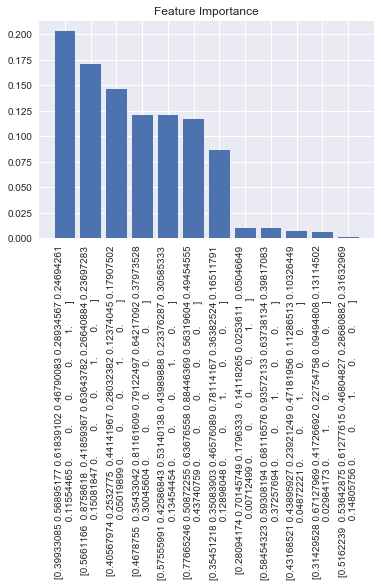

In [45]:
feat_labels= train_data_x[::]
rfclf.fit(train_data_x,train_data_y)
importances = rfclf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_data_x.shape[1]):
  print('%2d)%-*s %f' %(f+1,30,
                        feat_labels[indices[f]],
                        importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(train_data_x.shape[1]),
              importances[indices],
              align='center')

plt.xticks(range(train_data_x.shape[1]),
           feat_labels[indices],rotation=90)
plt.xlim([-1,train_data_x.shape[1]])
plt.tight_layout()
plt.show()

In [44]:
best_features = train_data_x.columns[indices[0:7]]
train_data_x = train_data_x[best_features]
test_data = test_data[best_features]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
params={'max_depth':[2,3,4,5,6,10,15,20],'learning_rate':[0.001,0.01,0.1,0.5,1]}
xgb_clf = XGBClassifier(objective="multi:softprob", max_depth=6, learning_rate=0.001)
xgb_clf = GridSearchCV(xgb_clf,params,refit='True',n_jobs=-1,cv=5)
xgb_clf.fit(train_data_x,train_data_y)
## eta=0.001,max_depth=6